# numpy data load

In [ ]:
import numpy as np

train_data=np.load('data_train.npy')
train_target=np.load('target_train.npy')

test_data=np.load('data_test.npy')
test_target=np.load('target_test.npy')

# train test split

In [ ]:
# from sklearn.model_selection import train_test_split

# train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.05)

In [ ]:
train_data.shape

(5232, 224, 224, 1)

In [ ]:
train_target.shape

(5232, 2)

In [ ]:
test_data.shape

(624, 224, 224, 1)

In [ ]:
test_target.shape

(624, 2)

# custom model

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.callbacks import ModelCheckpoint
model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=(224,224,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
#Dense layer of 32 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 128)     1280      
                                                                 
 activation_2 (Activation)   (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 activation_3 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

checkpoint_filepath = 'xray.h5'
# ModelCheckpoint allosw model to save weight everytime loss is reduced
my_checkpointer = [
                   EarlyStopping(monitor='val_loss', patience=10, verbose=0),
                   ModelCheckpoint(filepath=checkpoint_filepath, verbose=0, save_best_only=True)
                   ]

adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
        x=train_data,
        y=train_target,
        batch_size=16,
        epochs=10,
        validation_split=0.2,
#         validation_data=(x_val,y_val),
        callbacks=my_checkpointer,
    )

Epoch 1/10
262/262 [==============================] - 23s 82ms/step - loss: 0.4109 - accuracy: 0.8256 - val_loss: 0.1178 - val_accuracy: 0.9589
Epoch 2/10
262/262 [==============================] - 21s 81ms/step - loss: 0.1771 - accuracy: 0.9388 - val_loss: 0.1112 - val_accuracy: 0.9570
Epoch 3/10
262/262 [==============================] - 16s 59ms/step - loss: 0.1450 - accuracy: 0.9517 - val_loss: 0.1158 - val_accuracy: 0.9542
Epoch 4/10
262/262 [==============================] - 21s 81ms/step - loss: 0.1179 - accuracy: 0.9627 - val_loss: 0.0926 - val_accuracy: 0.9637
Epoch 5/10
262/262 [==============================] - 21s 80ms/step - loss: 0.0999 - accuracy: 0.9656 - val_loss: 0.0874 - val_accuracy: 0.9685
Epoch 6/10
262/262 [==============================] - 16s 59ms/step - loss: 0.0822 - accuracy: 0.9704 - val_loss: 0.1088 - val_accuracy: 0.9570
Epoch 7/10
262/262 [==============================] - 16s 63ms/step - loss: 0.0838 - accuracy: 0.9720 - val_loss: 0.0522 - val_accuracy:

In [ ]:
scores = model.evaluate(test_data, test_target, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.3183432817459106
Test accuracy: 0.7724359035491943


In [ ]:
from matplotlib import pyplot as plt

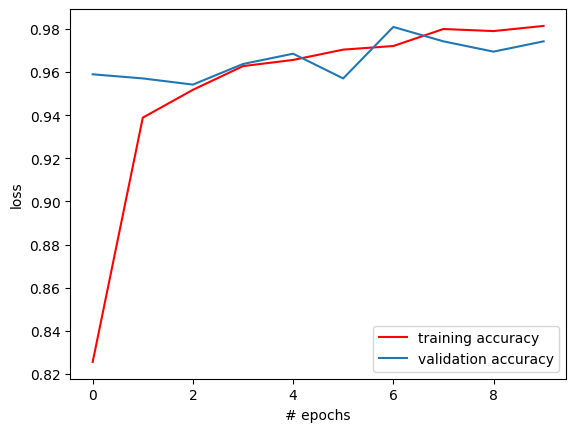

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

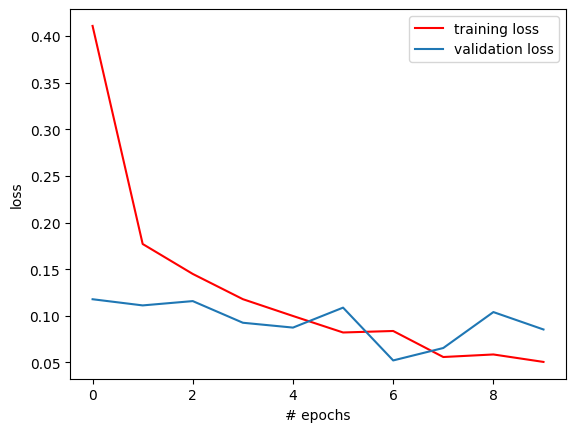

In [ ]:


plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

20/20 [==============================] - 1s 26ms/step
Confusion Matrix:
[[  0   0]
 [102 522]]


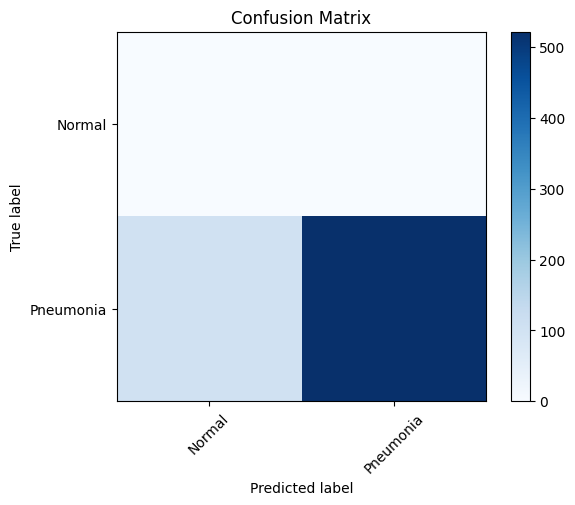

Classification Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         0
   Pneumonia       1.00      0.84      0.91       624

    accuracy                           0.84       624
   macro avg       0.50      0.42      0.46       624
weighted avg       1.00      0.84      0.91       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

test_data=np.load('data_test.npy')
test_target=np.load('target_test.npy')
# Load the model from the H5 file
model = load_model('/content/xray_dense100.h5')

# Assuming you have test data in the form of (X_test, y_true)
# Make sure to preprocess your test data before feeding it to the model

# Example of data preprocessing
# X_test = preprocess_data(X_test)

# Predict the classes for the test set
y_pred_prob = model.predict(test_data)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_target, axis=1), y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Normal', 'Pneumonia']  # Update with your class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(np.argmax(test_target, axis=1), y_pred, target_names=classes))
